## Google Play Store
##### Source: https://www.kaggle.com/lava18/google-play-store-apps/download

Imported pandas library for data manupulation and analysis

Imported matplolib for ploting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using ggplot and xkdc-style for ploting and graphying 

In [2]:
plt.style.use('ggplot')
plt.xkcd();

Importing data

In [3]:
df = pd.read_csv('data/googleplaystore.csv')

In [4]:
#df.describe()

In [5]:
#df.head()

### Does paid apps receive better ratings?

In [6]:
df.Reviews.describe()

count     10841
unique     6002
top           0
freq        596
Name: Reviews, dtype: object

Recognizing paid apps listed in the data

In [7]:
paid = df[df['Price'] !='0']
#paid.head()

In [8]:
#paid.describe()

Recognizing free apps listed in the data

In [9]:
free = df[df['Price'] =='0']
#free.head()

In [10]:
#free.describe()

Finding the mean

In [11]:
df[df['Price']!= '0']['Rating'].mean()

4.28935185185185

In [12]:
df[df['Price'] == '0']['Rating'].mean()

4.186202546163562

Null Hypothesis: Number paid apps > number of good ratings

Alternative Hypothesis: Number paid apps <= number of good ratings

In [13]:
import seaborn as sns

Dropping null values

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
df.dropna(subset = ['Rating'], inplace = True)

In [16]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Plotting 

C:\Users\gpalv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


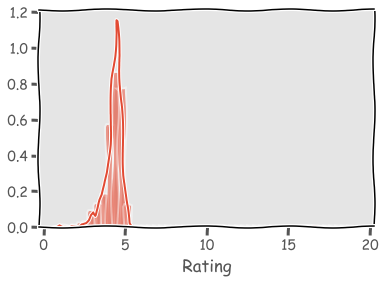

In [17]:
sns.distplot(df[df['Price'] != '0']['Rating'])

In [18]:
df_subset = df[df['Rating'] < 10]

C:\Users\gpalv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


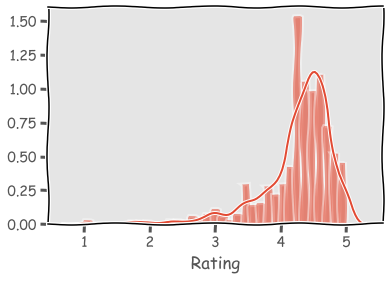

In [19]:
sns.distplot(df_subset[df_subset['Price'] != '0']['Rating'])

C:\Users\gpalv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


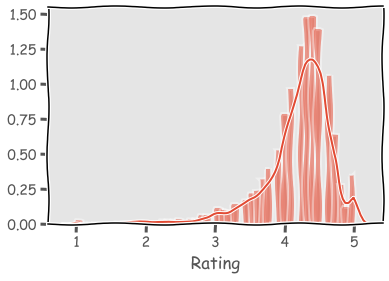

In [20]:
sns.distplot(df[df['Price'] == '0']['Rating'])

C:\Users\gpalv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


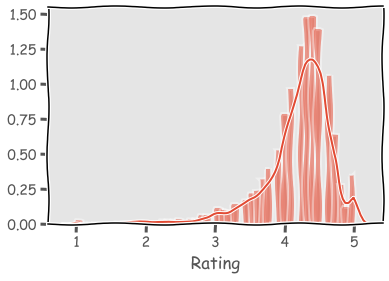

In [21]:
sns.distplot(df_subset[df_subset['Price'] == '0']['Rating'])

In [22]:
df_subset[df_subset['Price'] == '0']['Rating'].std()

0.5123380418563792

In [23]:
df_subset[df_subset['Price'] != '0']['Rating'].std()

0.5475231128355261

(array([  15.,   17.,   39.,   69.,  125.,  416.,  826., 1592., 3911.,
        1709.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

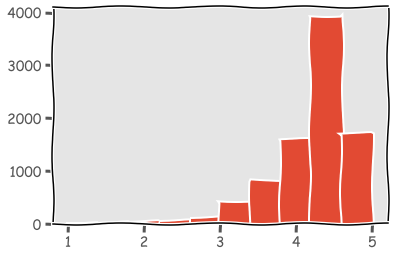

In [24]:
plt.hist(df[df['Price'] == '0']['Rating'])

Importing scipy

In [25]:
from scipy.stats import ttest_ind

In [26]:
ttest_ind(df_subset[df_subset['Price'] != '0']['Rating'], df_subset[df_subset['Price'] == '0']['Rating'], equal_var=False)

Ttest_indResult(statistic=3.619962711026508, pvalue=0.0003149306617059253)

Is there a relationship in the population, and the relationship in the sample reflects this?

Is there no relationship in the population, and the relationship in the sample reflects only sampling error?

##### Based on the low pvalue we can reject the null hypothesis 